In [ ]:
# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

response_data_btc = requests.get(btc_url).json()
import json 
print(json.dumps(response_data_btc, indent=4))

btc_value = response_data_btc["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price

response_data_eth = requests.get(eth_url).json()
import json
print(json.dumps(response_data_eth, indent=4))

eth_value = response_data_eth["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18738993,
            "total_supply": 18738993,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 35414.0,
                    "volume_24h": 28630565856,
                    "market_cap": 664395861010,
                    "percentage_change_1h": -0.989535241337063,
                    "percentage_change_24h": -0.465709013676323,
                    "percentage_change_7d": -0.705664143128996,
                    "percent_change_1h": -0.989535241337063,
                    "percent_change_24h": -0.465709013676323,
                    "percent_change_7d": -0.705664143128996
                },
                "CAD": {
                    "price": 44150.6338,
                    "volume_24h": 35693726452.6752,
             

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format (most recent 1000 days data)
today = pd.Timestamp("2021-06-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = api.get_barset( 
    tickers, 
    timeframe, 
    start=today, 
    end=today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                       SPY  \
                            open    high       low  close   volume    open   
time                                                                         
2021-06-10 00:00:00-04:00  115.3  115.31  114.8605  115.3  3665934  422.96   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-10 00:00:00-04:00  424.63  421.55  423.58  43577329

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.3
Current SPY closing price: $423.58


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21179.00
The current value of your 200 AGG shares is $23060.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
value_of_crypto = my_btc_value + my_eth_value
value_of_shares = my_spy_value + my_agg_value
data = {'amount':[value_of_crypto, value_of_shares]}


# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,53969.975
shares,44239.000


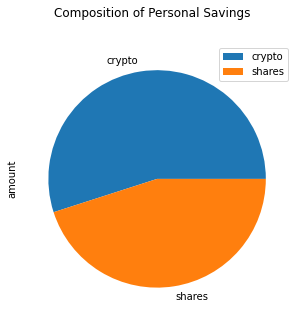

In [12]:
# Plot savings pie chart
df_savings = df_savings.plot.pie(title="Composition of Personal Savings", subplots = True, figsize=(5,5)) 


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = value_of_crypto + value_of_shares

# Validate saving health

#for total_savings in df_savings:
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations! Your have reached your goal for emergency fund.")
else: 
    print(f"You are {emergency_fund - total_savings} dollars away from reaching your goal for emergency fund")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset( 
    tickers, 
    timeframe, 
    start=start_date, 
    end=end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998856,1.019058,1.004088,0.988967,1.003832,0.996611,0.990672,0.997185,1.012013,1.002286,...,1.003207,1.002332,1.007412,1.001454,1.012848,0.997839,0.997868,0.996002,1.004002,0.988475
2,0.996608,1.027087,0.998580,0.997835,1.018215,0.995250,0.997195,1.004129,1.004460,1.007275,...,1.012419,0.995127,1.003897,1.005280,1.005160,0.990457,1.004964,0.994337,1.015597,0.977739
3,0.998309,1.033665,1.010002,1.005058,1.018450,0.993927,0.999486,1.004596,1.000429,0.990921,...,1.008037,0.988397,1.013001,1.002305,1.022538,0.994838,1.000704,0.993864,1.020326,0.982076
4,0.980264,1.024160,1.005072,0.997038,1.023653,0.990550,1.006802,1.004021,1.002008,0.990211,...,0.999493,0.998222,1.033016,1.000713,1.026649,0.999266,0.999426,0.989619,1.028881,0.987900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.369230,25.479683,8.840565,8.951827,22.573879,31.774499,18.985494,15.132393,6.541587,8.156735,...,16.057860,8.514622,6.256092,85.670699,26.425008,21.897536,20.228695,58.387707,25.269749,28.605050
7557,15.420081,25.685265,8.868176,9.153816,22.555365,32.003486,19.199030,15.354569,6.566345,8.204600,...,15.954805,8.456174,6.229106,84.921079,26.673348,21.745421,20.176428,59.382475,25.064709,28.653500
7558,15.266916,25.777787,8.852031,9.222605,22.605076,31.844315,19.262800,15.276161,6.528508,8.207404,...,16.049475,8.462225,6.182100,84.286134,26.695428,21.930082,19.917948,58.642032,24.842616,28.496130
7559,15.424693,25.755403,8.735526,9.288500,22.609994,31.668829,19.258574,15.172199,6.495551,8.175481,...,16.033506,8.435931,6.154001,84.980879,26.856598,21.975242,20.152689,58.620833,25.133879,28.936612


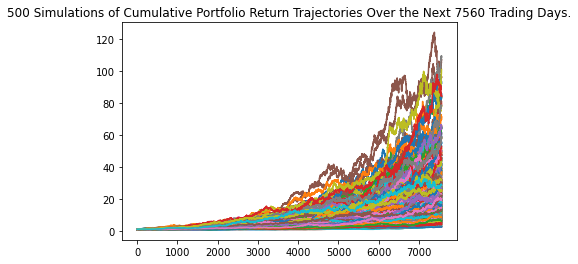

In [19]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

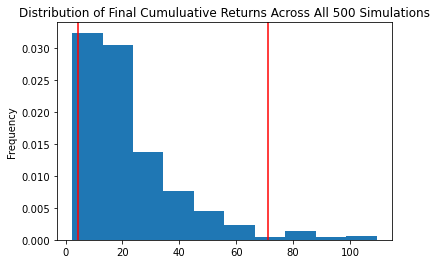

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.515442
std              17.432920
min               2.335960
25%              10.833984
50%              17.736987
75%              29.000618
max             109.322540
95% CI Lower      4.496313
95% CI Upper     71.272207
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89926.25 and $1425444.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134889.38 and $2138166.21


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_fiveyear.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993761,1.001859,1.011031,1.004006,1.003015,1.000271,1.004807,1.015341,0.991771,0.996024,...,0.997965,1.010845,0.998828,0.999522,1.003838,1.007407,1.006526,0.996980,1.001687,1.004227
2,0.994423,0.996249,1.007267,1.001673,1.013453,0.996117,1.000233,1.018450,0.984307,0.995249,...,1.000095,1.006170,0.999028,1.005541,1.007615,1.007933,0.991736,1.000181,0.999623,1.003457
3,0.997973,0.997976,1.013592,1.005745,1.019118,0.988150,0.994504,1.017694,0.992658,0.998278,...,1.011509,1.008118,1.001300,1.015964,1.003286,0.995944,0.987649,0.992772,0.999403,0.996407
4,0.998724,1.007807,1.020029,1.004260,1.014864,0.983908,1.003558,1.021901,0.996193,1.006958,...,1.016324,1.009356,1.002884,1.009984,1.006208,0.988634,0.991240,0.996319,0.997802,0.992636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.472468,2.500506,1.452426,1.211274,1.475949,1.622162,1.346399,1.366597,1.636683,1.515727,...,1.634483,1.471717,1.379480,1.583030,1.748162,1.686812,2.075433,1.337253,0.876118,1.548791
1257,1.479640,2.497417,1.447027,1.219368,1.475321,1.615738,1.332602,1.358292,1.644209,1.522459,...,1.636535,1.480592,1.377023,1.583061,1.738727,1.674796,2.072686,1.337929,0.874510,1.541068
1258,1.479915,2.498805,1.452882,1.219740,1.471724,1.609040,1.327844,1.364487,1.653558,1.523098,...,1.644061,1.471172,1.371304,1.583084,1.761685,1.681755,2.071824,1.346438,0.875095,1.535249
1259,1.480343,2.521755,1.466507,1.217429,1.481915,1.626361,1.345374,1.362518,1.653676,1.522262,...,1.640188,1.459914,1.377630,1.588936,1.755601,1.696406,2.067984,1.362806,0.876621,1.542452


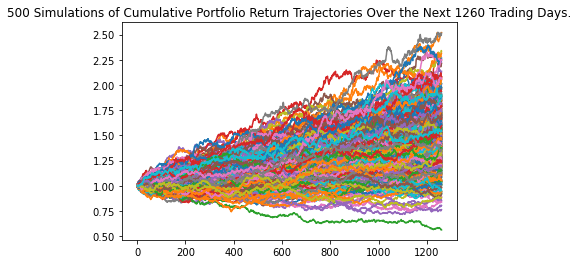

In [26]:
# Plot simulation outcomes
line_plot_five = MC_fiveyear.plot_simulation()

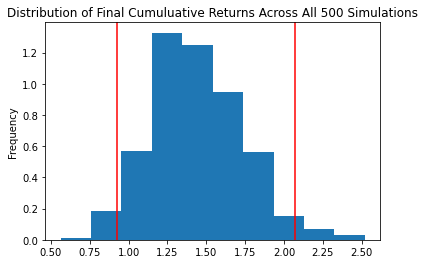

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_fiveyear.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.442314
std               0.295807
min               0.561830
25%               1.239317
50%               1.405496
75%               1.637652
max               2.520534
95% CI Lower      0.928238
95% CI Upper      2.071152
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*60000,2)
ci_upper_five = round(tbl_five[9]*60000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55694.26 and $124269.14


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_tenyear.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996571,1.001380,1.007150,1.001699,0.991965,1.006111,0.997646,1.000771,0.992775,0.993082,...,1.001675,0.994504,0.999601,0.999058,1.003780,0.994372,1.006106,0.996430,0.999050,1.003118
2,0.987799,1.001584,1.012822,0.990728,0.998910,1.009041,0.988333,0.998008,0.990792,0.995616,...,0.995705,0.994389,0.999362,0.997009,1.002982,0.990596,1.006765,1.000654,1.002459,1.000918
3,0.986565,0.996309,1.021103,0.997815,0.996085,1.014386,0.987653,0.988255,0.997862,0.999276,...,0.994418,1.000091,1.008100,0.995305,0.997472,0.993291,1.000792,1.000656,1.004639,0.987668
4,0.983169,0.998261,1.016499,0.992779,0.991559,1.010813,0.982393,0.982002,0.996258,1.000207,...,0.997896,0.991500,1.002390,0.991118,1.004811,0.997576,0.999443,1.003125,1.013731,0.994439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.822508,1.566532,2.088135,2.906116,2.137501,1.555447,3.329632,2.075249,1.732954,1.291885,...,1.816476,2.198730,2.418328,1.958513,2.283483,1.369055,2.856325,1.948388,2.926102,2.160702
2517,2.808862,1.582254,2.084488,2.886006,2.149541,1.560116,3.310582,2.078862,1.737036,1.289884,...,1.821028,2.220218,2.429874,1.983225,2.306300,1.367610,2.858314,1.947403,2.909796,2.149931
2518,2.802974,1.584999,2.082478,2.908773,2.143053,1.555738,3.309833,2.086585,1.724615,1.274018,...,1.826464,2.212740,2.403089,1.982754,2.319741,1.356700,2.847450,1.954594,2.868449,2.144717
2519,2.793130,1.579273,2.078936,2.929237,2.154331,1.555245,3.316736,2.091071,1.735941,1.267874,...,1.832853,2.230881,2.416840,1.996612,2.317142,1.358234,2.828080,1.954116,2.890038,2.135517


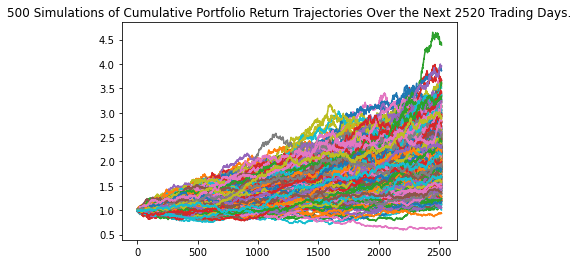

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_tenyear.plot_simulation()

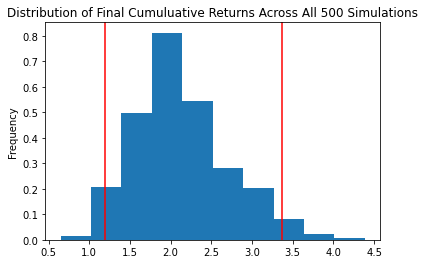

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_tenyear.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.111816
std               0.575382
min               0.647075
25%               1.711434
50%               2.050639
75%               2.439551
max               4.387105
95% CI Lower      1.190388
95% CI Upper      3.370156
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*60000,2)
ci_upper_ten = round(tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}") 

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $71423.29 and $202209.34
